In [ ]:
# 1) Clone & cd
!git clone https://github.com/alonlahav123/DSC291-CLIP-Dissect.git
%cd DSC291-CLIP-Dissect

# # 2) Install PyTorch & torchvision
# !pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu117

# 3) Install other deps
!pip install -r requirements.txt

# 3b) install these again (not sure why but this works)
!pip install tokenizer ftfy sentence-transformers==2.2.0

# 4) Download the Broden dataset (images only) using
!bash dlbroden.sh

Cloning into 'DSC291-CLIP-Dissect'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 116 (delta 40), reused 115 (delta 39), pack-reused 0 (from 0)
Receiving objects: 100% (116/116), 15.95 MiB | 13.91 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/DSC291-CLIP-Dissect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.9 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of transformers 

In [ ]:
# 5) (Optional) Download Places-365 ResNet-18
# !bash dlzoo_example.sh

In [ ]:
!pwd

/content/DSC291-CLIP-Dissect


In [ ]:
%%bash
# 1) choose a single root directory
ROOT=data/imagenet-test
mkdir -p "$ROOT"

# 2) download the 2017 DET “test_new” tarball
wget --continue \
  --user='alonlahav123' \
  --password='4$toWxh785zN9&w' \
  https://image-net.org/data/ILSVRC/2017/ILSVRC2017_DET_test_new.tar.gz \
  -O "$ROOT"/ILSVRC2017_DET_test_new.tar.gz

# 3) extract into the same folder
tar -xzf "$ROOT"/ILSVRC2017_DET_test_new.tar.gz -C "$ROOT"

# 4) (optional) remove the .tar.gz to save space
rm "$ROOT"/ILSVRC2017_DET_test_new.tar.gz

--2025-06-04 22:45:02--  https://image-net.org/data/ILSVRC/2017/ILSVRC2017_DET_test_new.tar.gz
Resolving image-net.org (image-net.org)... 171.64.68.16
Connecting to image-net.org (image-net.org)|171.64.68.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448746246 (428M) [application/x-gzip]
Saving to: ‘data/imagenet-test/ILSVRC2017_DET_test_new.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  149K 48m59s
    50K .......... .......... .......... .......... ..........  0%  298K 36m45s
   100K .......... .......... .......... .......... ..........  0%  298K 32m40s
   150K .......... .......... .......... .......... ..........  0%  115M 24m30s
   200K .......... .......... .......... .......... ..........  0% 54.0M 19m38s
   250K .......... .......... .......... .......... ..........  0%  300K 20m25s
   300K .......... .......... .......... .......... ..........  0% 72.7M 17m31s
   350K .......... .......... .......... .......... ....

In [ ]:
# 7) This will dissect 5 layers of ResNet-50(ImageNet) using Broden as the
#    probing dataset. Results will be saved in
#    results/resnet50_{datetime}/descriptions.csv.

!python describe_neurons.py

100%|███████████████████████████████████████| 335M/335M [00:26<00:00, 13.0MiB/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:00<00:00, 238MB/s]
100% 100/100 [00:02<00:00, 40.80it/s]
100% 317/317 [00:29<00:00, 10.93it/s]
100% 317/317 [00:38<00:00,  8.22it/s]
100% 64/64 [00:00<00:00, 204.22it/s]
torch.Size([64, 20000])
100% 256/256 [00:00<00:00, 267.19it/s]
torch.Size([256, 20000])
100% 512/512 [00:01<00:00, 299.44it/s]
torch.Size([512, 20000])
100% 1024/1024 [00:03<00:00, 269.34it/s]
torch.Size([1024, 20000])
100% 2048/2048 [00:06<00:00, 307.60it/s]
torch.Size([2048, 20000])


## ViT Qualitative

In [ ]:
import os
#virtually move to parent directory
# os.chdir("..")

import torch

import matplotlib
from matplotlib import pyplot as plt

import utils
import data_utils
import similarity

## Settings

In [ ]:
clip_name = 'ViT-B/16'
d_probe = 'imagenet_broden'
concept_set = 'data/20k.txt'
batch_size = 200
device = 'cuda'
pool_mode = 'avg'

save_dir = 'saved_activations'
similarity_fn = similarity.soft_wpmi

In [ ]:
target_name = 'vit_b_16'
target_layer = 'encoder'

## Run CLIP-Dissect

In [ ]:
!pwd

/content/DSC291-CLIP-Dissect


In [ ]:
import importlib
import data_utils
# Make your changes to my_utils.py in the Colab editor

importlib.reload(data_utils)

<module 'data_utils' from '/content/DSC291-CLIP-Dissect/data_utils.py'>

In [ ]:
utils.save_activations(clip_name = clip_name, target_name = target_name, target_layers = [target_layer],
                       d_probe = d_probe, concept_set = concept_set, batch_size = batch_size,
                       device = device, pool_mode=pool_mode, save_dir = save_dir)

with open(concept_set, 'r') as f:
    words = (f.read()).split('\n')

pil_data = data_utils.get_data(d_probe)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 235MB/s]
100%|██████████| 345/345 [02:23<00:00,  2.40it/s]


In [ ]:
save_names = utils.get_save_names(clip_name = clip_name, target_name = target_name,
                                  target_layer = target_layer, d_probe = d_probe,
                                  concept_set = concept_set, pool_mode=pool_mode,
                                  save_dir = save_dir)

target_save_name, clip_save_name, text_save_name = save_names

similarities, target_feats = utils.get_similarity_from_activations(target_save_name, clip_save_name,
                                                                text_save_name, similarity_fn, device=device)

100%|██████████| 768/768 [00:02<00:00, 268.98it/s]


torch.Size([768, 20000])


## Visualize

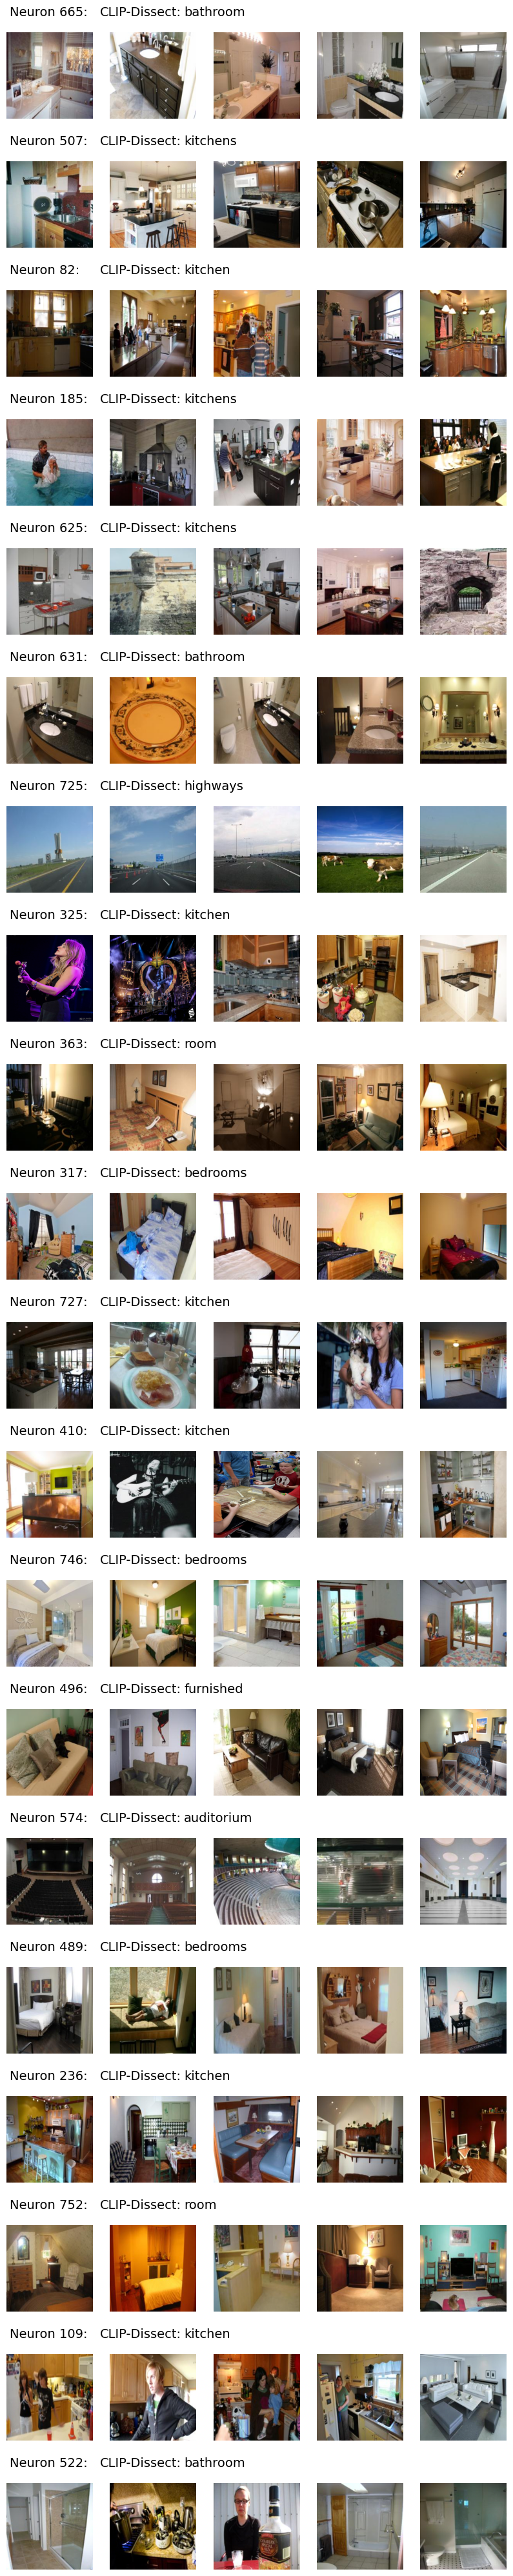

In [ ]:
top_vals, top_ids = torch.topk(target_feats, k=5, dim=0)
neurons_to_check = torch.sort(torch.max(similarities, dim=1)[0], descending=True)[1][0:20]
font_size = 14
font = {'size'   : font_size}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=[10, len(neurons_to_check)*2])#constrained_layout=True)
subfigs = fig.subfigures(nrows=len(neurons_to_check), ncols=1)
for j, orig_id in enumerate(neurons_to_check):
    vals, ids = torch.topk(similarities[orig_id], k=5, largest=True)

    subfig = subfigs[j]
    subfig.text(0.13, 0.96, "Neuron {}:".format(int(orig_id)), size=font_size)
    subfig.text(0.27, 0.96, "CLIP-Dissect:", size=font_size)
    subfig.text(0.4, 0.96, words[int(ids[0])], size=font_size)
    axs = subfig.subplots(nrows=1, ncols=5)
    for i, top_id in enumerate(top_ids[:, orig_id]):
        im, label = pil_data[top_id]
        im = im.resize([375,375])
        axs[i].imshow(im)
        axs[i].axis('off')
plt.show()